# 데이터 분석 4조 


주요 기술
- Bar 함수로 특정 연도 각 분야의 전력 사용량 막대그래프로 출력
- Pie 함수로 총 전력 사용량 중 각 분야의 전력 사용량을 원그래프로 출력
- Plot 함수를 연도별 경제 성장률과 각 분야의 전력 사용량을 꺾은선그래프로 출력
- Scatter 함수로 연도별 경제 성장률과 특정 분야의 산점도로 출력
- Subplot 함수를 사용해서 위의 여러 그래프를 한눈에 표시

예상 결과물
- 경제 성장률에 따른 각 분야의 전력 사용량의 상관관계 파악
- 발견한 상관관계를 파이썬의 맷플롯립 라이브러리를 통해 시각화

기대효과
- 연도별 전력수급 실적 데이터를 분석하여 연도별 총 전력 사용량과 각 부문의 전력 사용량 변화가 연도별 경제 성장률의 변화와 상관관계가 있는지 확인할 수 있다.
- 연도별로 각 부문의 전력 사용량 변화를 시각화하여 한국의 각 부문의 전력 사용량이 어떻게 변하였는지를 보다 시각적으로 보여줄 수 있다.
- 협업 과정을 효율적으로 개선할 수 있다.

<h3>예상 결과(가설 설정)</h3>

- 전력 소비량의 증감에 따라 경제성장율이 변하는 상관관계가 있을 것이다.

환경설정

In [9]:
%config InlineBackend.figure_format = 'retina' # 시각화 데이터를 더 선명하게 함

In [10]:
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
import numpy as np

# 한글 및 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False


In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('연도별_전력수급_실적.csv', encoding='cp949')
data = csv.reader(f)
next(data)

['시점',
 '경제성장률 (%)',
 '설비용량(연말) (천kW)',
 '설비용량(연말)-성장률 (%)',
 '최대전력 (천kW)',
 '최대전력-성장률 (%)',
 '설비예비율 (%)',
 '공급예비율 (%)',
 '총발전량 (백만kWh)',
 '총발전량-성장률 (%)',
 '이용률 (%)',
 '발전소내 소비전력률 (%)',
 '발전소내 소비전력량 (백만kWh)',
 '판매전력량 (백만kWh)',
 '판매전력량-수요성장률 (%)',
 '송전전력량(양수제외) (백만kWh)',
 '송배전손실률 (%)',
 '주택용판매전력량 (백만kWh)',
 '일반용판매전력량 (백만kWh)',
 '교육용판매전력량 (백만kWh)',
 '산업용판매전력량 (백만kWh)',
 '농사용판매전력량 (백만kWh)',
 '가로등판매전력량 (백만kWh)',
 '심야판매전력량 (백만kWh)',
 '평균전력 (천kW)',
 '부하율 (%)',
 '열효율(발전단Gross) (%)',
 '인구1인당전력소비량 (kWh/년)']

연도별  인구1인당전력소비량 (kWh/년) 변화율 

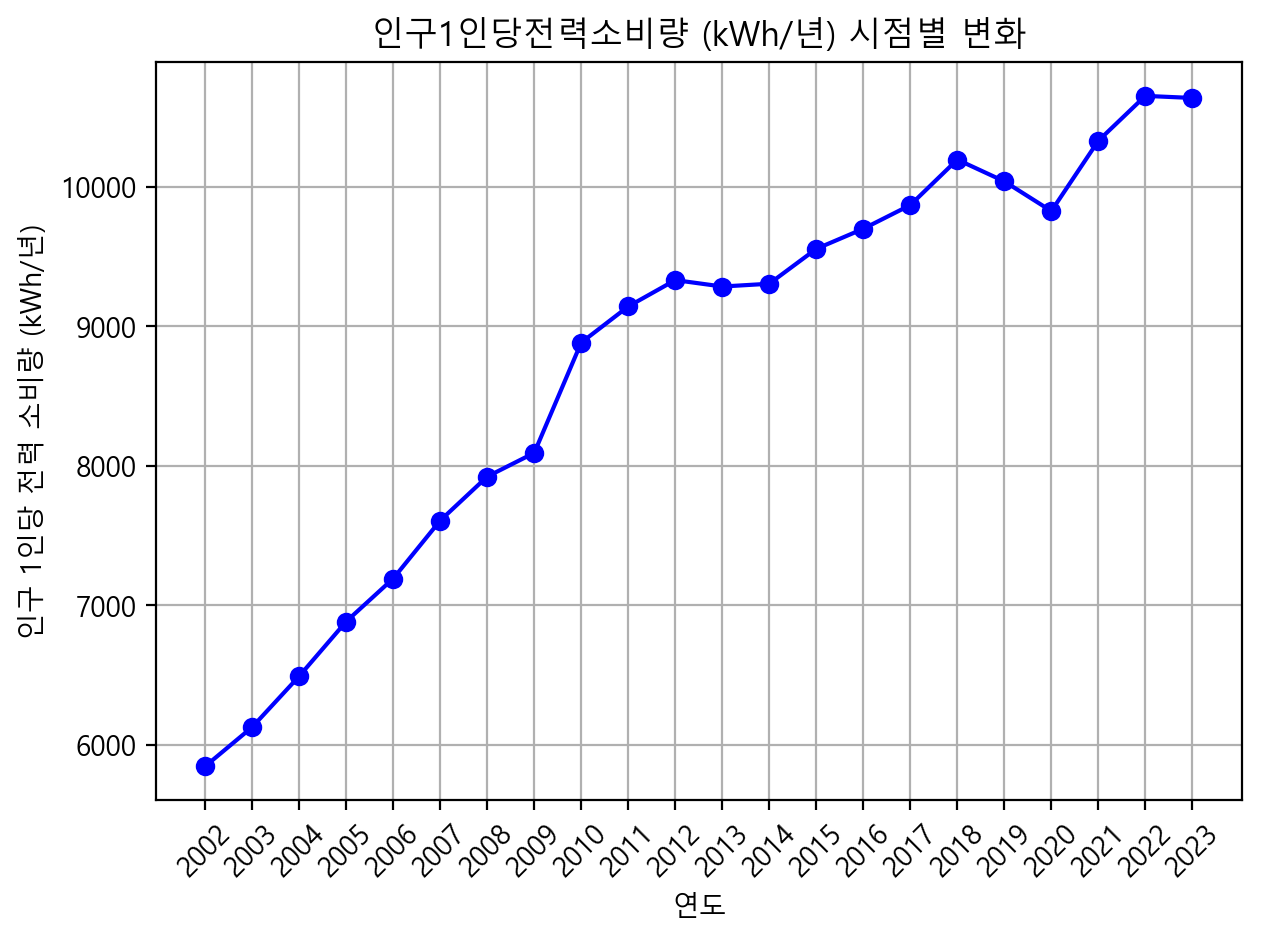

In [12]:
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open('연도별_전력수급_실적.csv', encoding='cp949')
data = csv.reader(f)
next(data)  # 헤더를 건너뛰기

# 시점과 '인구1인당전력소비량 (kWh/년)' 추출
years = []
power_per_capita = []

for row in data:
    years.append(row[0])  # 시점(연도)
    power_per_capita.append(float(row[-1]))  # '인구1인당전력소비량 (kWh/년)' (마지막 열)

# 파일 닫기
f.close()

# 그래프 설정
plt.plot(years, power_per_capita, marker='o', linestyle='-', color='b')  # 시점 별 전력 소비량 그래프
plt.title('인구1인당전력소비량 (kWh/년) 시점별 변화')
plt.xlabel('연도')
plt.ylabel('인구 1인당 전력 소비량 (kWh/년)')
plt.xticks(rotation=45)  # 연도 레이블 회전
plt.grid(True)

# 그래프 출력
plt.tight_layout()  # 레이아웃 조정
plt.show()


'경제성장률 (%) 시점별 변화'

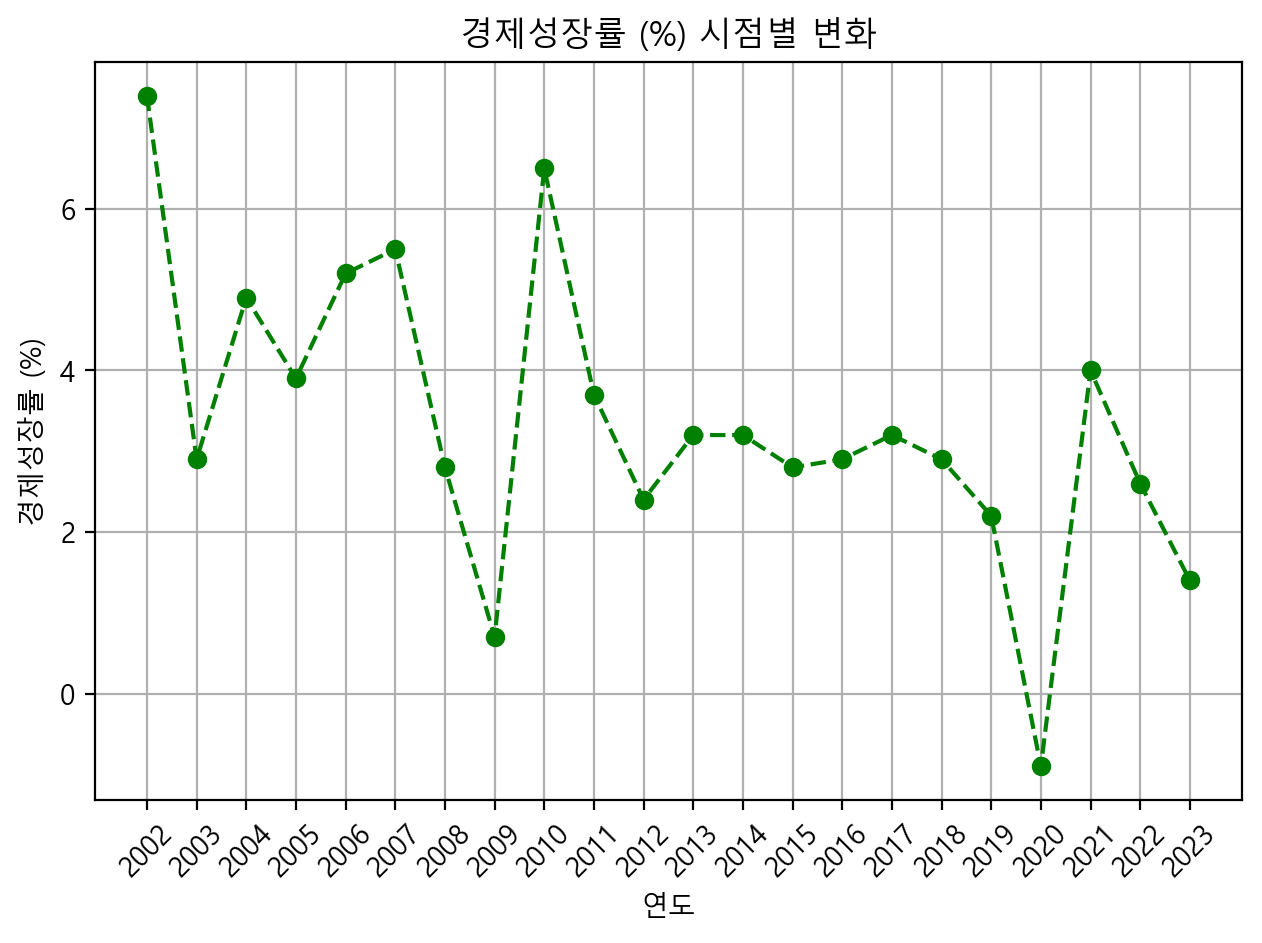

In [13]:
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open('연도별_전력수급_실적.csv', encoding='cp949')
data = csv.reader(f)
next(data)  # 헤더를 건너뛰기

# 시점과 '경제성장률 (%)', 추출
years = []
power_per_capita = []

for row in data:
    years.append(row[0])  # 시점(연도)
    power_per_capita.append(float(row[1]))  # '경제성장률 (%)',

# 파일 닫기
f.close()

# 그래프 설정
plt.plot(years, power_per_capita, marker='o', linestyle='--', color='g')  # 시점 별 전력 소비량 그래프
plt.title('경제성장률 (%) 시점별 변화')
plt.xlabel('연도')
plt.ylabel('경제성장률 (%)')
plt.xticks(rotation=45)  # 연도 레이블 회전
plt.grid(True)

# 그래프 출력
plt.tight_layout()  # 레이아웃 조정
plt.show()


연도별 인구1인당전력소비량 (kWh/년)과 경제성장률 (%) 비교

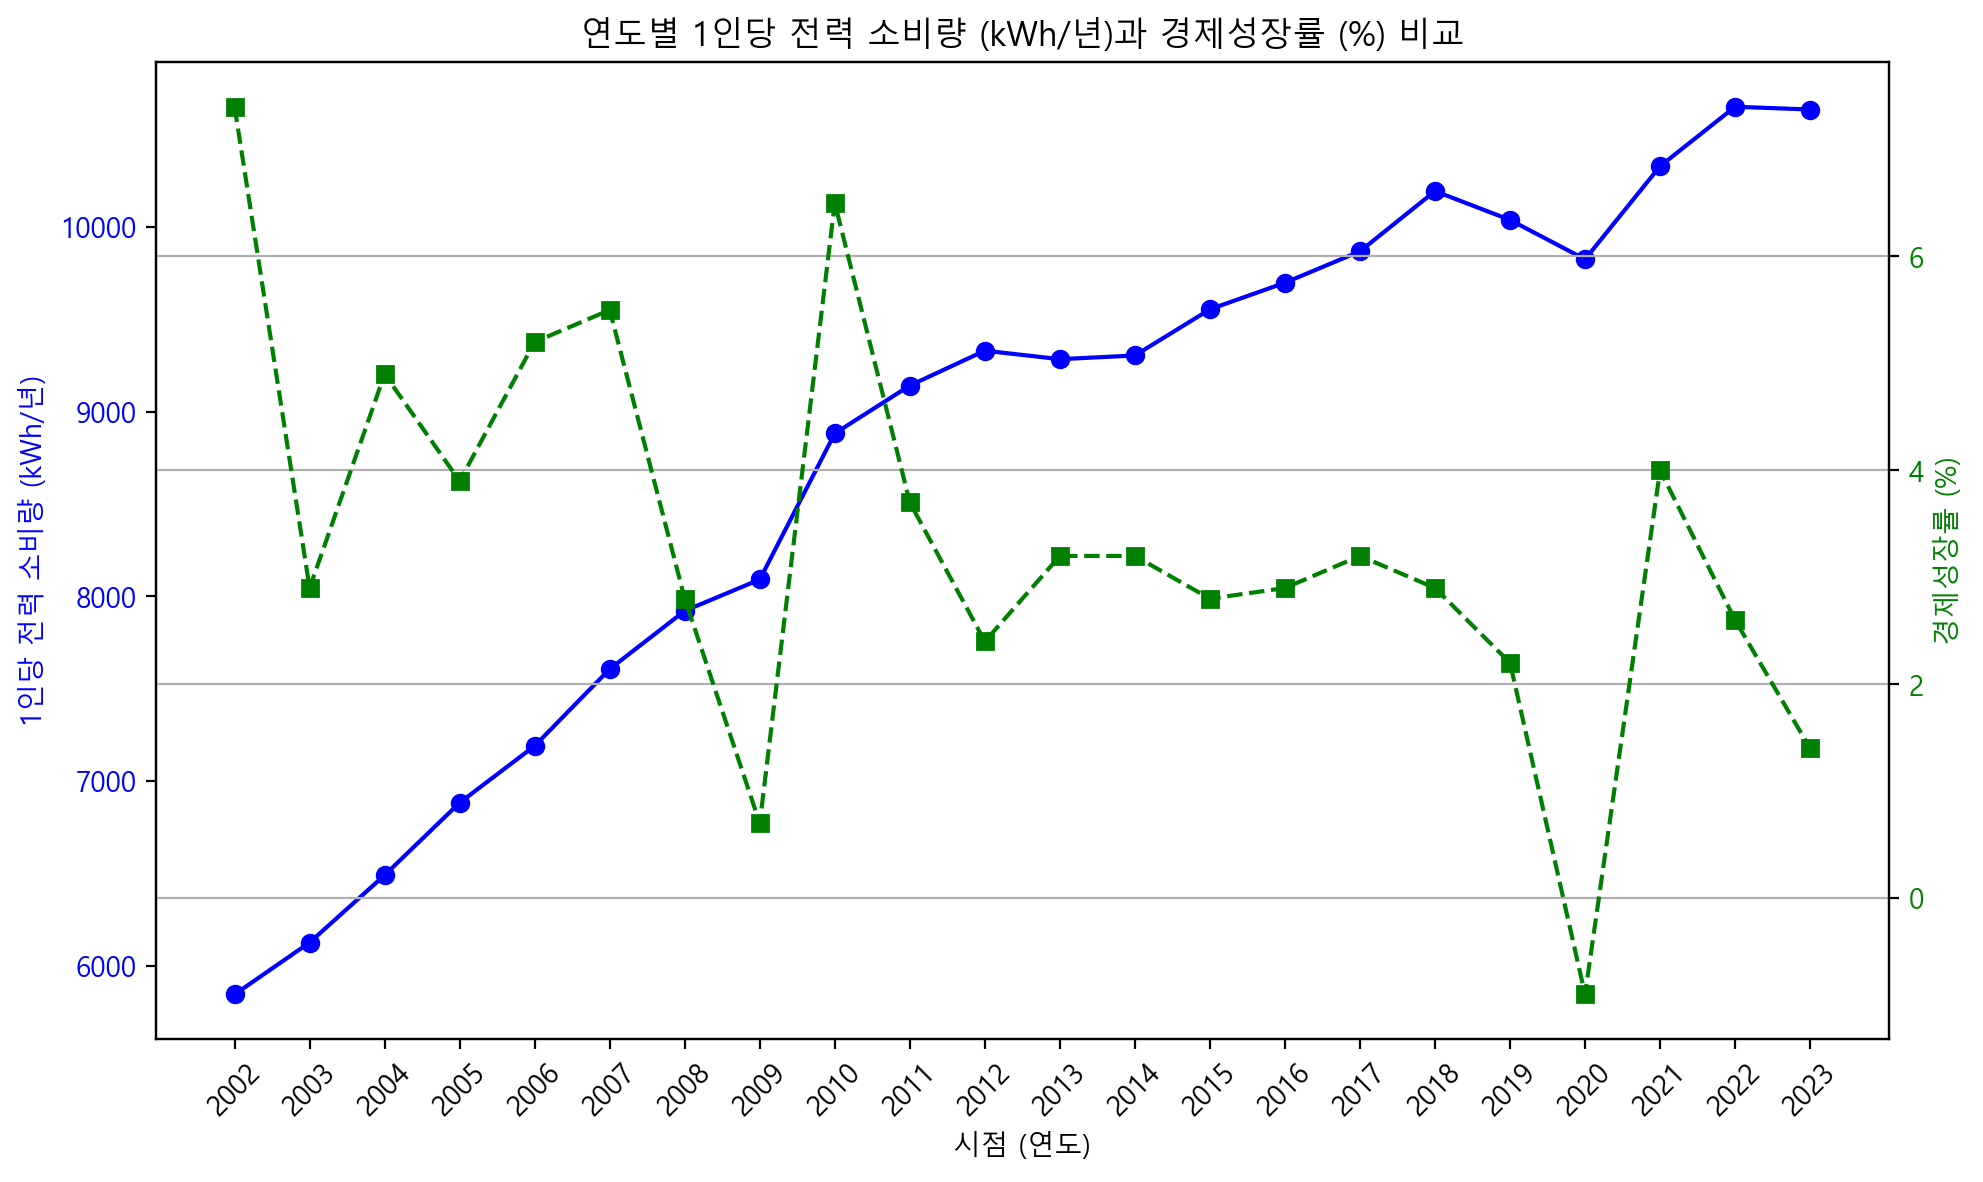

In [14]:
import csv
import matplotlib.pyplot as plt

# '연도별_전력수급_실적.csv' 파일을 열고 데이터 읽기
f = open('연도별_전력수급_실적.csv', encoding='cp949')
data = csv.reader(f)
next(data)  # 헤더를 건너뛰기

# 연도, '인구1인당전력소비량 (kWh/년)', '경제성장률 (%)' 데이터 추출
years = []
power_per_capita = []
growth_rate = []

for row in data:
    years.append(row[0])  # 시점(연도)
    power_per_capita.append(float(row[-1]))  # '인구1인당전력소비량 (kWh/년)' (마지막 열)
    growth_rate.append(float(row[1]))  # '경제성장률 (%)' (두 번째 열)

f.close()  # 파일 닫기

# 시각화를 위한 두 개의 서브플롯 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 그래프: '인구1인당전력소비량 (kWh/년)'
ax1.plot(years, power_per_capita, marker='o', color='b', label='인구1인당전력소비량 (kWh/년)')
ax1.set_xlabel('시점 (연도)')
ax1.set_ylabel('1인당 전력 소비량 (kWh/년)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# x축의 tick 위치를 설정 (set_ticks 호출)
ax1.set_xticks(range(len(years)))  # x축 위치 설정
ax1.set_xticklabels(years, rotation=45)  # x축 레이블 설정

# 두 번째 y축을 사용하여 '경제성장률 (%)' 그래프 추가
ax2 = ax1.twinx()
ax2.plot(years, growth_rate, marker='s', color='g', linestyle='--', label='경제성장률 (%)')
ax2.set_ylabel('경제성장률 (%)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# 타이틀 추가
plt.title('연도별 1인당 전력 소비량 (kWh/년)과 경제성장률 (%) 비교')

# 그래프 출력
fig.tight_layout()  # 레이아웃 조정
plt.grid(True)
plt.show()


할일
- 1인당 국민총생산 (GDP)와 1인당 전력 소비량 분석
- 일반용판매전력량 (백만kWh) 산업용판매전력량 (백만kWh) 농사용판매전력량 (백만kWh)과 경제 성장율 비교하기 
- **('일반용판매전력'의 주 사용자는 상업건물/사무실이기에 '상업용 전력'이라고 생각하면 편하다. )**
- **(판매전력량이란 가정이나 기업 등에 전기를 판매한 양을 뜻한다. 이 총사용전력량이 필요한 경우 데이터분석에서는 총사용전력량 대신 판매전력사용량을 사용한다.)**
- 각 전기 사용량을 pie 함수로 정리한다.

Bar 함수로 1인당 GDP와 전력 사용량 막대그래프로 출력

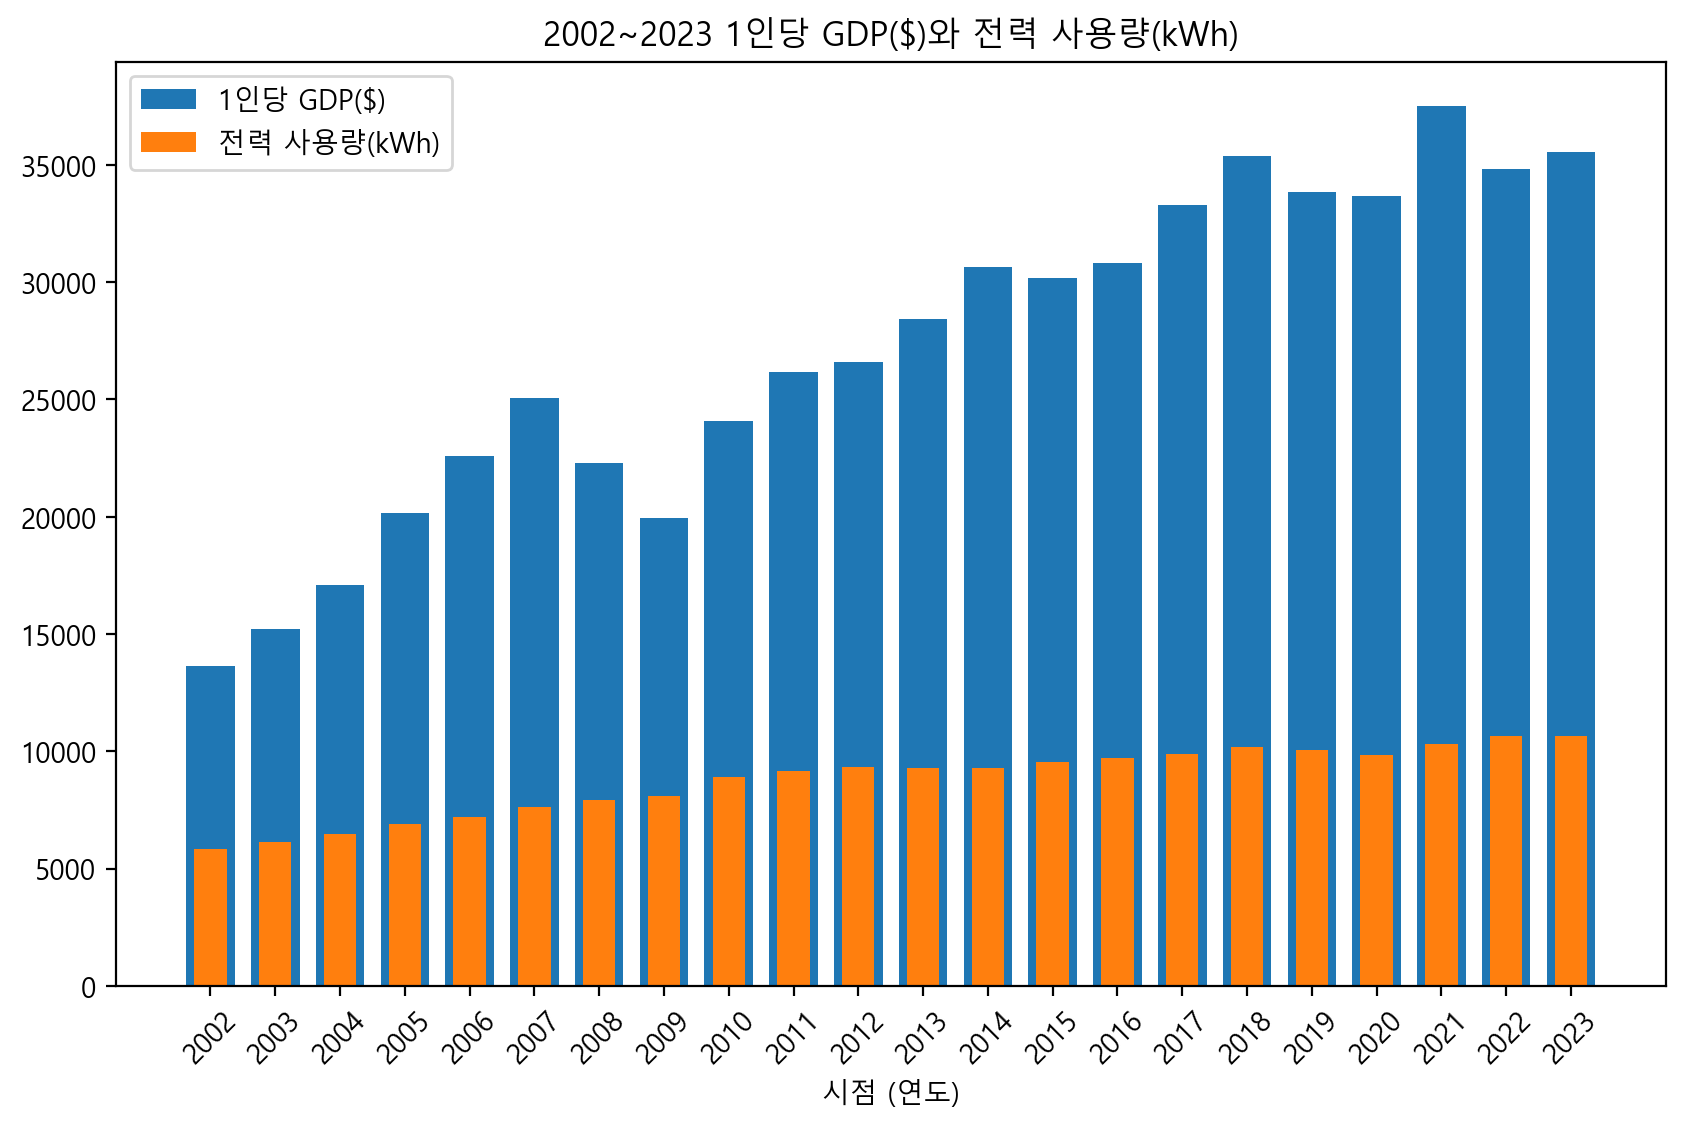

In [15]:
# Bar 함수로 1인당 GDP와 전력 사용량 막대그래프로 출력

# GDP 파일 열기
gdp_f = open('1인당_국내총생산__당해년가격.csv', encoding='cp949')
gdp_data = csv.reader(gdp_f)
next(gdp_data)  # 헤더를 건너뛰기

# '1인당 국내총생산 당해년(미달러)', 추출
gdp = []

for row in gdp_data:
    gdp.append(float(row[2]))  # 1인당 국내총생산 당해년(미달러)

gdp.pop() # 연도별 전력수급 실적은 2024년 데이터가 존재하지 않음


width = 0.75

plt.figure(figsize=(10, 6))
plt.title("2002~2023 1인당 GDP($)와 전력 사용량(kWh)")
plt.bar(years, gdp, width = 0.75, label = "1인당 GDP($)")
plt.bar(years, power_per_capita, width = 0.5, label = "전력 사용량(kWh)")
plt.xlabel("시점 (연도)")
plt.xticks(rotation=45)  # 연도 레이블 회전
plt.legend()

plt.show()


Pie 함수로 총 전력 사용량 중 각 분야의 전력 사용량을 원그래프로 출력

In [16]:
# Pie 함수로 총 전력 사용량 중 각 분야의 전력 사용량을 원그래프로 출력

Plot 함수를 연도별 경제 성장률과 각 분야의 전력 사용량을 꺾은선그래프로 출력

In [17]:
# Plot 함수를 연도별 경제 성장률과 각 분야의 전력 사용량을 꺾은선그래프로 출력

Scatter 함수로 연도별 경제 성장률과 특정 분야의 산점도로 출력

In [18]:
# Scatter 함수로 연도별 경제 성장률과 특정 분야의 산점도로 출력

Subplot 함수를 사용해서 위의 여러 그래프를 한눈에 표시

In [19]:
# Subplot 함수를 사용해서 위의 여러 그래프를 한눈에 표시